In [12]:
#-*-coding:utf-8-*-
import pandas as pd
import glob
import math
import scipy.stats as st
from scipy.special import gamma
import numpy as np

from datetime import datetime
import xlrd

KeyboardInterrupt: 

In [6]:
## 读取成分股2011-01-04 ~ 2021-11-03的数据

path = r'/Users/linbeibei/Desktop/毕设/data' # 路径
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, encoding='gbk')
    li.append(df)

stk_all = pd.concat(li, axis=0, ignore_index=True)

In [5]:
stk_all

,code,datetime,price
0,SH600000,43362.399306,9.90
1,SH600000,43362.402778,9.90
2,SH600000,43362.406250,9.88
3,SH600000,43362.409722,9.86
4,SH600000,43362.413194,9.87
...,...,...,...
30242011,SZ300677,43472.611111,15.16
30242012,SZ300677,43472.614583,15.13
30242013,SZ300677,43472.618056,15.16
30242014,SZ300677,43472.621528,15.15


In [7]:
# 取关健列
stk_all = stk_all[['StockID', 'date', 'close']]
stk_all.columns = ['code', 'datetime', 'price']

# 时间格式转换
datetime = stk_all['datetime'].to_list()
date = []
time = []
for i in range(len(datetime)):
    if (i%10000==0):
        print(i/len(datetime))
    dt = float(datetime[i])
    dt = xlrd.xldate.xldate_as_datetime(dt, 0)
    d = dt.__format__('%Y-%m-%d')
    t = dt.__format__('%X')
    date.append(d)
    time.append(t)
stk_all['date'] = date
stk_all['time'] = time
stk_all.drop('datetime', axis=1)
stk_all = stk_all[['code', 'date', 'time', 'price']]
stk_all

0.0
0.0002713804362928998
0.0005427608725857996
0.0008141413088786994
0.0010855217451715992
0.0013569021814644991
0.0016282826177573988
0.0018996630540502987
0.0021710434903431984
0.0024424239266360986
0.0027138043629289983
0.002985184799221898
0.0032565652355147977
0.003527945671807698
0.0037993261081005975
0.004070706544393498
0.004342086980686397
0.004613467416979297
0.004884847853272197
0.005156228289565096
0.0054276087258579965
0.005698989162150896
0.005970369598443796
0.006241750034736696
0.006513130471029595
0.0067845109073224955
0.007055891343615396
0.007327271779908295
0.007598652216201195
0.007870032652494094
0.008141413088786995
0.008412793525079895
0.008684173961372794
0.008955554397665695
0.009226934833958594
0.009498315270251493
0.009769695706544394
0.010041076142837294
0.010312456579130193
0.010583837015423094
0.010855217451715993
0.011126597888008892
0.011397978324301792
0.011669358760594693
0.011940739196887592
0.012212119633180491
0.012483500069473392
0.01275488050576

0.11018045713491732
0.11045183757121023
0.11072321800750312
0.11099459844379603
0.11126597888008892
0.11153735931638183
0.11180873975267473
0.11208012018896762
0.11235150062526053
0.11262288106155342
0.11289426149784633
0.11316564193413922
0.11343702237043213
0.11370840280672502
0.11397978324301793
0.11425116367931082
0.11452254411560372
0.11479392455189662
0.11506530498818952
0.11533668542448243
0.11560806586077532
0.11587944629706823
0.11615082673336112
0.11642220716965403
0.11669358760594692
0.11696496804223983
0.11723634847853272
0.11750772891482562
0.11777910935111852
0.11805048978741142
0.11832187022370431
0.11859325065999722
0.11886463109629013
0.11913601153258302
0.11940739196887593
0.11967877240516882
0.11995015284146172
0.12022153327775462
0.12049291371404752
0.12076429415034041
0.12103567458663332
0.12130705502292621
0.12157843545921912
0.12184981589551201
0.12212119633180492
0.12239257676809782
0.12266395720439072
0.12293533764068362
0.12320671807697652
0.12347809851326942


0.22361747950534946
0.22388885994164234
0.22416024037793525
0.22443162081422816
0.22470300125052106
0.22497438168681394
0.22524576212310685
0.22551714255939975
0.22578852299569266
0.22605990343198554
0.22633128386827844
0.22660266430457135
0.22687404474086426
0.22714542517715716
0.22741680561345004
0.22768818604974295
0.22795956648603585
0.22823094692232876
0.22850232735862164
0.22877370779491454
0.22904508823120745
0.22931646866750036
0.22958784910379323
0.22985922954008614
0.23013060997637905
0.23040199041267195
0.23067337084896486
0.23094475128525774
0.23121613172155064
0.23148751215784355
0.23175889259413646
0.23203027303042933
0.23230165346672224
0.23257303390301515
0.23284441433930805
0.23311579477560093
0.23338717521189384
0.23365855564818674
0.23392993608447965
0.23420131652077256
0.23447269695706544
0.23474407739335834
0.23501545782965125
0.23528683826594415
0.23555821870223703
0.23582959913852994
0.23610097957482284
0.23637236001111575
0.23664374044740863
0.23691512088370154


0.3389541649298319
0.33922554536612476
0.3394969258024177
0.33976830623871057
0.34003968667500345
0.3403110671112964
0.34058244754758926
0.3408538279838822
0.3411252084201751
0.34139658885646795
0.3416679692927609
0.34193934972905377
0.3422107301653467
0.3424821106016396
0.34275349103793246
0.3430248714742254
0.34329625191051827
0.34356763234681115
0.3438390127831041
0.34411039321939696
0.3443817736556899
0.34465315409198277
0.34492453452827565
0.3451959149645686
0.34546729540086146
0.3457386758371544
0.3460100562734473
0.34628143670974015
0.3465528171460331
0.34682419758232597
0.34709557801861884
0.3473669584549118
0.34763833889120466
0.3479097193274976
0.34818109976379047
0.34845248020008335
0.3487238606363763
0.34899524107266916
0.3492666215089621
0.349538001945255
0.34980938238154785
0.3500807628178408
0.35035214325413366
0.35062352369042654
0.3508949041267195
0.35116628456301235
0.3514376649993053
0.35170904543559817
0.35198042587189105
0.352251806308184
0.35252318674447686
0.3527

0.4534767090454356
0.4537480894817285
0.4540194699180214
0.4542908503543143
0.4545622307906072
0.4548336112269001
0.455104991663193
0.4553763720994859
0.45564775253577877
0.4559191329720717
0.4561905134083646
0.4564618938446575
0.4567332742809504
0.4570046547172433
0.4572760351535362
0.4575474155898291
0.457818796026122
0.4580901764624149
0.4583615568987078
0.4586329373350007
0.4589043177712936
0.45917569820758647
0.4594470786438794
0.4597184590801723
0.4599898395164652
0.4602612199527581
0.460532600389051
0.4608039808253439
0.4610753612616368
0.4613467416979297
0.4616181221342226
0.4618895025705155
0.4621608830068084
0.4624322634431013
0.46270364387939417
0.4629750243156871
0.46324640475198
0.4635177851882729
0.4637891656245658
0.46406054606085867
0.4643319264971516
0.4646033069334445
0.4648746873697374
0.4651460678060303
0.4654174482423232
0.4656888286786161
0.465960209114909
0.46623158955120186
0.4665029699874948
0.4667743504237877
0.4670457308600806
0.4673171112963735
0.46758849173

0.5704416770876755
0.5707130575239683
0.5709844379602612
0.5712558183965541
0.571527198832847
0.5717985792691399
0.5720699597054328
0.5723413401417258
0.5726127205780186
0.5728841010143115
0.5731554814506045
0.5734268618868973
0.5736982423231902
0.5739696227594832
0.574241003195776
0.5745123836320689
0.5747837640683618
0.5750551445046547
0.5753265249409476
0.5755979053772405
0.5758692858135335
0.5761406662498263
0.5764120466861192
0.5766834271224122
0.576954807558705
0.5772261879949979
0.5774975684312909
0.5777689488675837
0.5780403293038766
0.5783117097401695
0.5785830901764624
0.5788544706127553
0.5791258510490482
0.5793972314853412
0.579668611921634
0.5799399923579269
0.5802113727942199
0.5804827532305127
0.5807541336668056
0.5810255141030986
0.5812968945393914
0.5815682749756843
0.5818396554119772
0.5821110358482701
0.582382416284563
0.5826537967208559
0.5829251771571489
0.5831965575934417
0.5834679380297346
0.5837393184660276
0.5840106989023204
0.5842820793386133
0.584553459774906

0.6884921668750869
0.6887635473113798
0.6890349277476726
0.6893063081839655
0.6895776886202585
0.6898490690565513
0.6901204494928442
0.6903918299291372
0.69066321036543
0.6909345908017229
0.6912059712380159
0.6914773516743088
0.6917487321106016
0.6920201125468946
0.6922914929831875
0.6925628734194803
0.6928342538557732
0.6931056342920662
0.693377014728359
0.6936483951646519
0.6939197756009449
0.6941911560372377
0.6944625364735306
0.6947339169098236
0.6950052973461165
0.6952766777824093
0.6955480582187022
0.6958194386549952
0.696090819091288
0.6963621995275809
0.6966335799638739
0.6969049604001667
0.6971763408364596
0.6974477212727526
0.6977191017090454
0.6979904821453383
0.6982618625816313
0.6985332430179242
0.698804623454217
0.69907600389051
0.6993473843268029
0.6996187647630957
0.6998901451993886
0.7001615256356816
0.7004329060719744
0.7007042865082673
0.7009756669445603
0.7012470473808531
0.701518427817146
0.701789808253439
0.7020611886897319
0.7023325691260247
0.7026039495623176
0.

0.8062712762262053
0.8065426566624982
0.8068140370987912
0.8070854175350841
0.8073567979713769
0.8076281784076699
0.8078995588439628
0.8081709392802556
0.8084423197165486
0.8087137001528415
0.8089850805891343
0.8092564610254273
0.8095278414617202
0.809799221898013
0.810070602334306
0.8103419827705989
0.8106133632068918
0.8108847436431846
0.8111561240794776
0.8114275045157705
0.8116988849520633
0.8119702653883563
0.8122416458246492
0.812513026260942
0.812784406697235
0.8130557871335279
0.8133271675698207
0.8135985480061136
0.8138699284424066
0.8141413088786995
0.8144126893149923
0.8146840697512853
0.8149554501875782
0.815226830623871
0.815498211060164
0.8157695914964569
0.8160409719327497
0.8163123523690426
0.8165837328053356
0.8168551132416284
0.8171264936779213
0.8173978741142143
0.8176692545505072
0.8179406349868
0.818212015423093
0.8184833958593859
0.8187547762956787
0.8190261567319717
0.8192975371682646
0.8195689176045574
0.8198402980408503
0.8201116784771433
0.8203830589134361
0.8

0.9243217660136168
0.9245931464499096
0.9248645268862026
0.9251359073224955
0.9254072877587883
0.9256786681950813
0.9259500486313742
0.9262214290676671
0.92649280950396
0.9267641899402529
0.9270355703765458
0.9273069508128386
0.9275783312491316
0.9278497116854245
0.9281210921217173
0.9283924725580103
0.9286638529943032
0.928935233430596
0.929206613866889
0.9294779943031819
0.9297493747394748
0.9300207551757677
0.9302921356120606
0.9305635160483535
0.9308348964846463
0.9311062769209393
0.9313776573572322
0.931649037793525
0.931920418229818
0.9321917986661109
0.9324631791024037
0.9327345595386967
0.9330059399749896
0.9332773204112825
0.9335487008475754
0.9338200812838683
0.9340914617201612
0.934362842156454
0.934634222592747
0.9349056030290399
0.9351769834653327
0.9354483639016257
0.9357197443379186
0.9359911247742114
0.9362625052105044
0.9365338856467973
0.9368052660830902
0.937076646519383
0.937348026955676
0.9376194073919689
0.9378907878282617
0.9381621682645547
0.9384335487008476
0.9

,code,date,time,price
0,SZ002241,2018-09-19,09:35:00,8.180000
1,SZ002241,2018-09-19,09:40:00,8.190000
2,SZ002241,2018-09-19,09:45:00,8.190000
3,SZ002241,2018-09-19,09:50:00,8.180000
4,SZ002241,2018-09-19,09:55:00,8.160000
...,...,...,...,...
36848635,SZ002773,2019-01-07,14:40:00,26.284616
36848636,SZ002773,2019-01-07,14:45:00,26.284616
36848637,SZ002773,2019-01-07,14:50:00,26.307693
36848638,SZ002773,2019-01-07,14:55:00,26.323078


In [10]:
# 找出每个交易日有多少只股票的数据
stk_count = stk_all[stk_all['time'] == '09:35:00']
stk_count = stk_count.groupby('date', as_index=False).count()
stk_count = stk_count[['date', 'time']]
stk_count.columns = ['date', 'num of stocks']
stk_count

,date,num of stocks
0,2011-01-04,293
1,2011-01-05,292
2,2011-01-06,293
3,2011-01-07,292
4,2011-01-10,294
...,...,...
2628,2021-10-28,300
2629,2021-10-29,300
2630,2021-11-01,300
2631,2021-11-02,300


Text(0.5, 1.0, '2011-01-04 ~ 2021-11-03')

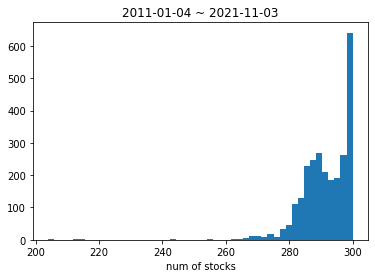

In [15]:
import matplotlib.pyplot as plt

num_stk = stk_count['num of stocks'].tolist()
plt.hist(num_stk, bins=50)
plt.xlabel('num of stocks')
plt.title('2011-01-04 ~ 2021-11-03')

In [16]:
# 取2011-01-04 ~ 2013-07-11数据
stk = stk_all[stk_all['date'] < '2013-07-12']
stk = stk.sort_values(by=['date', 'time'], ascending=[True, True])

## 取出代码
c = stk['code'].to_list()
code = []
for i in c:
     if not i in code:
            code.append(i)

## 按代码排序
stk_new = stk[stk['code'] == code[0]]
for i in range(1, len(code)):
    df = stk[stk['code'] == code[i]]
    stk_new = pd.concat([stk_new, df], ignore_index=True)
stk = stk_new

Text(0.5, 1.0, '2011-01-04 ~ 2013-07-11')

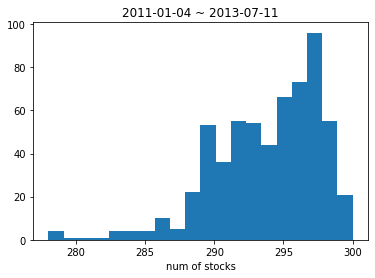

In [19]:
stk_count = stk[stk['time'] == '09:35:00']
stk_count = stk_count.groupby('date', as_index=False).count()
stk_count = stk_count[['date', 'time']]
stk_count.columns = ['date', 'num of stocks']

num_stk = stk_count['num of stocks'].tolist()
plt.hist(num_stk, bins=20)
plt.xlabel('num of stocks')
plt.title('2011-01-04 ~ 2013-07-11')

In [20]:
stk_count

,date,num of stocks
0,2011-01-04,293
1,2011-01-05,292
2,2011-01-06,293
3,2011-01-07,292
4,2011-01-10,294
...,...,...
604,2013-07-05,293
605,2013-07-08,295
606,2013-07-09,294
607,2013-07-10,293


In [21]:
# 存档5min数据
save_5 = stk
#stk = save_5

In [22]:
# 提取10min数据
time = stk['time'].unique().tolist()
time_10 = []
for i in range(1, len(time), 2):
    time_10.append(time[i])

# 筛选
stk_10 = stk[stk['time'] == time_10[0]]
for i in range(1, len(time_10)):
    df = stk[stk['time'] == time_10[i]]
    stk_10 = pd.concat([stk_10, df])
stk = stk_10.sort_values(by=['date', 'time'], ascending=[True, True], ignore_index=True)
stk

,code,date,time,price
0,SZ000900,2011-01-04,09:40:00,4.779612
1,SH600535,2011-01-04,09:40:00,12.117857
2,SH601158,2011-01-04,09:40:00,5.917000
3,SH600881,2011-01-04,09:40:00,6.240000
4,SZ000027,2011-01-04,09:40:00,4.620000
...,...,...,...,...
4293499,SH600060,2013-07-11,15:00:00,10.030000
4293500,SZ002269,2013-07-11,15:00:00,3.528000
4293501,SZ000963,2013-07-11,15:00:00,9.408333
4293502,SZ000156,2013-07-11,15:00:00,17.275000


In [23]:
# 存档10min数据
save_10 = stk

In [24]:
## 筛选股票

# 移除前复权价格小于0的股票
# 无法计算对数价格
stocks = stk['code'].unique().tolist()
math_err = stk[stk['price'] <= 0]['code'].unique().tolist()
for x in math_err:
    stocks.remove(x)

stk_new = stk[stk['code'] == stocks[0]]
for i in range(1, len(stocks)):
    df = stk[stk['code'] == stocks[i]]
    stk_new = pd.concat([stk_new, df], ignore_index=True)
stk = stk_new

In [25]:
## 计算对数价格
stk['p'] = stk.apply(lambda x: math.log(x['price']), axis=1)

## 计算对数收益率
stk['r'] = stk.groupby(['code', 'date'])['p'].diff()

# stk = stk[~(stk['time'] == '09:35:00')] # 5min
stk = stk[~(stk['time'] == '09:40:00')] # 10min

In [32]:
# save = stk
stk = save

In [33]:
# 剔除日内收益率相同的交易日数据（BPV计算为0）
def count_zero(df):
    r = df['r'].tolist()
    count = 0
    for i in range(len(r)):
        if r[i] == 0:
            count = count + 1
    return count

stk_count = stk.groupby(['code', 'date']).apply(count_zero)
stk_count = pd.DataFrame(stk_count, columns = ['count_zero'])
stk_count = stk_count.reset_index()

M = 23 # 一天共M个收益率
stk = pd.merge(stk, stk_count, on=['code', 'date'], how='left')
stk = stk[~(stk['count_zero'] >= 14)] # 根据实际情况而定，直到不存在BPV=0的情况！
# stk.drop('count_zero', axis=1)

In [34]:
## 计算BPV
def cal_BPV(df):
    
    r = df['r'].tolist()
    M = len(r)
    count = 0
    for i in range(M-1):
        count = count + abs(r[i+1]) * abs(r[i])
    BPV = math.pi / 2 * (M / (M - 1)) * count
    
    return BPV

# 整理表格
stk_apply = stk.groupby(['code', 'date']).apply(cal_BPV)
stk_apply = pd.DataFrame(stk_apply, columns = ['BPV'])
stk_day = stk_apply.reset_index()

# 计算M
stk_m = stk.groupby(['code', 'date'], as_index=False)['r'].count()
stk_m.columns = ['code', 'date', 'M']

# 合并表格
stk_day = pd.merge(stk_day, stk_m, on=['code', 'date'])

# 计算除数sqrt(BPV/M)
stk_day['div'] = stk_day.apply(lambda x: math.sqrt(x['BPV'] / x['M']), axis=1)
stk_day

,code,date,BPV,M,div
0,SH600000,2011-01-04,0.000669,23,0.005391
1,SH600000,2011-01-05,0.000270,23,0.003425
2,SH600000,2011-01-06,0.000184,23,0.002830
3,SH600000,2011-01-07,0.003300,23,0.011979
4,SH600000,2011-01-10,0.000464,23,0.004491
...,...,...,...,...,...
176198,SZ002673,2013-07-05,0.000243,23,0.003247
176199,SZ002673,2013-07-08,0.000623,23,0.005204
176200,SZ002673,2013-07-09,0.000359,23,0.003948
176201,SZ002673,2013-07-10,0.000334,23,0.003814


In [35]:
# 检查
stk_day[stk_day['BPV'] == 0]

,code,date,BPV,M,div


In [36]:
## 标准化对数收益率
stk = pd.merge(stk, stk_day, on=['code', 'date'])
stk['R'] = stk.apply(lambda x: x['r'] / x['div'], axis=1)
stk.drop('div', axis=1, inplace=True)
stk

,code,date,time,price,p,r,count_zero,BPV,M,R
0,SZ000900,2011-01-04,09:50:00,4.755944,1.559395,-0.004964,1,0.000273,23,-1.440058
1,SZ000900,2011-01-04,10:00:00,4.734905,1.554962,-0.004433,1,0.000273,23,-1.286080
2,SZ000900,2011-01-04,10:10:00,4.737535,1.555517,0.000555,1,0.000273,23,0.161072
3,SZ000900,2011-01-04,10:20:00,4.766463,1.561605,0.006088,1,0.000273,23,1.765917
4,SZ000900,2011-01-04,10:30:00,4.792762,1.567107,0.005502,1,0.000273,23,1.596103
...,...,...,...,...,...,...,...,...,...,...
4052664,SZ000539,2013-07-10,14:20:00,2.950000,1.081805,0.002829,11,0.000120,23,1.238982
4052665,SZ000539,2013-07-10,14:30:00,2.958333,1.084626,0.002821,11,0.000120,23,1.235487
4052666,SZ000539,2013-07-10,14:40:00,2.950000,1.081805,-0.002821,11,0.000120,23,-1.235487
4052667,SZ000539,2013-07-10,14:50:00,2.950000,1.081805,0.000000,11,0.000120,23,0.000000


In [37]:
## 计算最短半标估计量shortH
# 对于每一只股票，同一个时间段i所有交易日的价格需要参与计算shortH

def cal_shortH(df):
    
    # 取出所有交易日该时刻的标准化收益率
    R = df['R'].to_list()
    # 从小到大排序，得到顺序统计量
    R.sort()
    # 差分
    T = len(R)
    h = math.floor(T/2) + 1
    R = pd.DataFrame(R, columns=['R'])
    R = R.diff(h-1).dropna()
    R = R['R'].tolist()
    shortH = 0.741 * min(R)
    
    return shortH
    
# 按股票和时间段分组，找出所有交易日该时刻的价格    
stk_apply = stk.groupby(['code', 'time']).apply(cal_shortH)
stk_apply = pd.DataFrame(stk_apply, columns = ['shortH'])
stk_shortH = stk_apply.reset_index()
stk_shortH

## 计算周期性因子f
def cal_f(df):
    
    shortH = df['shortH'].to_list()
    M = len(shortH)
    
    count = 0
    for i in range(M):
        count = count + shortH[i]**2
    count = math.sqrt(count/M)
        
    return count

# 对于每只股票，计算每个时刻的周期性因子
stk_apply = stk_shortH.groupby(['code'], as_index=False).apply(cal_f)
stk_apply.columns = ['code', 'div']
stk_shortH = pd.merge(stk_shortH, stk_apply, on=['code'])
stk_shortH['f'] = stk_shortH.apply(lambda x: x['shortH'] / x['div'], axis=1)
stk_shortH.drop('div', inplace=True, axis=1)
stk_shortH

,code,time,shortH,f
0,SH600000,09:50:00,1.396491,1.562814
1,SH600000,10:00:00,1.176830,1.316991
2,SH600000,10:10:00,1.066072,1.193042
3,SH600000,10:20:00,0.978417,1.094947
4,SH600000,10:30:00,0.862694,0.965441
...,...,...,...,...
8850,SZ002673,14:20:00,0.809186,0.917224
8851,SZ002673,14:30:00,0.708737,0.803363
8852,SZ002673,14:40:00,0.790122,0.895614
8853,SZ002673,14:50:00,0.689495,0.781552


In [38]:
## 计算WSD因子
stk = pd.merge(stk, stk_shortH, on=['code', 'time'], how='left')

In [39]:
# 计算权重w
w = []
R = stk['R'].tolist()
f = stk['f'].tolist()
for i in range(len(R)):
    if f[i] == 0: # f可能出现为0的情况！
        w.append(0)
    else:
        d = (R[i] / f[i])**2
        if d <= 6.635:
            w.append(1)
        else:
            w.append(0)
stk['w'] = w

In [40]:
## 计算WSD

# 计算d（d可能出现0的情况）
stk_apply = stk.groupby(['code', 'time'])['w'].sum()
stk_apply = pd.DataFrame(stk_apply)
stk_WSD = stk_apply.reset_index()
stk_WSD.columns = ['code', 'time', 'd']
stk_WSD

# 计算u
def cal_u(df):
    w = df['w'].to_list()
    R = df['R'].to_list()
    T = len(w)
    
    u = 0
    for i in range(T):
        u = u + w[i] * R[i]**2
    return u
#     WSD = math.sqrt(1.081 * u / d)
    
#     return WSD

stk_apply = stk.groupby(['code', 'time']).apply(cal_u)
stk_apply = pd.DataFrame(stk_apply, columns = ['u'])
stk_u = stk_apply.reset_index()
stk_WSD = pd.merge(stk_WSD, stk_u, on=['code', 'time'], how='left')
stk_WSD

,code,time,d,u
0,SH600000,09:50:00,596,1177.983493
1,SH600000,10:00:00,601,975.710529
2,SH600000,10:10:00,595,724.483877
3,SH600000,10:20:00,592,674.790361
4,SH600000,10:30:00,595,559.061425
...,...,...,...,...
8850,SZ002673,14:20:00,120,84.656829
8851,SZ002673,14:30:00,117,79.881053
8852,SZ002673,14:40:00,121,83.594163
8853,SZ002673,14:50:00,120,72.310692


In [41]:
stk = pd.merge(stk, stk_WSD, on=['code', 'time'], how='left')

In [42]:
# 去除d=0的数据
stk = stk[~(stk['d'] == 0)]

# 计算WSD
stk['WSD'] = stk.apply(lambda x: math.sqrt(1.081 * x['u'] / x['d']), axis=1)

In [43]:
stk_WSD = stk[['code', 'time', 'WSD']]
stk_WSD = stk_WSD.drop_duplicates(ignore_index=True)
stk_WSD

,code,time,WSD
0,SZ000900,09:50:00,1.484570
1,SZ000900,10:00:00,1.235760
2,SZ000900,10:10:00,1.150014
3,SZ000900,10:20:00,1.003424
4,SZ000900,10:30:00,1.058688
...,...,...,...
8843,SZ000539,14:20:00,1.684787
8844,SZ000539,14:30:00,1.013233
8845,SZ000539,14:40:00,0.775099
8846,SZ000539,14:50:00,1.032935


In [44]:
## 计算调整因子f_WSD
def cal_f_WSD_div(df):
    WSD = df['WSD'].to_list()
    M = len(WSD)
    
    count = 0
    for i in range(M):
        count = count + WSD[i]**2
    div = math.sqrt(count/M)
    
    return div

stk_f_WSD_div = stk_WSD.groupby('code', as_index=False).apply(cal_f_WSD_div)
stk_f_WSD_div.columns = ['code', 'f_WSD_div']
stk_WSD = pd.merge(stk_WSD, stk_f_WSD_div, on=['code'], how='left')
stk_WSD['f_WSD'] = stk_WSD.apply(lambda x: x['WSD'] / x['f_WSD_div'], axis=1)
stk_WSD.drop('f_WSD_div', inplace=True, axis=1)
stk_WSD

,code,time,WSD,f_WSD
0,SZ000900,09:50:00,1.484570,1.505792
1,SZ000900,10:00:00,1.235760,1.253426
2,SZ000900,10:10:00,1.150014,1.166453
3,SZ000900,10:20:00,1.003424,1.017768
4,SZ000900,10:30:00,1.058688,1.073823
...,...,...,...,...
8843,SZ000539,14:20:00,1.684787,1.632783
8844,SZ000539,14:30:00,1.013233,0.981958
8845,SZ000539,14:40:00,0.775099,0.751174
8846,SZ000539,14:50:00,1.032935,1.001052


### （二）BLT：构造MCP统计量
step1：计算mcp
$$mcp_{t,j}=\frac{2}{n(n-1)}\sum_{i=1}^{n-1}\sum_{l=i+1}^n\frac{r_{i,t,j}}{f_{i,j}^{WSD}}\frac{r_{l,t,j}}{f_{l,j}^{WSD}}$$

1. $r_{i,t,j}$：第i支股票第t日第j个时间间隔的对数收益率
2. $f_{i,j}^{WSD}$：第i支股票第j个时间间隔的收益调整因子


step2：计算Z统计量
$$BLT联跳检验统计量Z_{mcp,t,j}=\frac{mcp_{t,j} - \bar{mcp_t}}{s_{mcp,t}}$$
1. $\bar{mcp_t}=\frac{1}{M}\sum_{j=1}^M mcp_{t,j}$
2. $s_{mcp,t}=\sqrt{\frac{1}{M-1}\sum_{j=1}{M}(mcp_{t,j}-\bar{mcp_t})^2}$


step3：bootstrap估计Z统计量的经验分布
$$CJ_t=I(Z_{mcp,t,j}>F_{\alpha})$$

In [45]:
stk = pd.merge(stk, stk_WSD, on=['code', 'time'], how='left')

In [46]:
## 计算mcp

def cal_mcp(df):
    
    r = df['r'].to_list()
    f_WSD = df['f_WSD'].to_list()
    n = len(r)
    
    mcp = 0
    for i in range(n-1):
        count = 0
        for j in range(i, n):
            count = count + r[j]/f_WSD[j]
        mcp = mcp + r[i] / f_WSD[i] * count
    mcp = 2 / (n * (n - 1)) * mcp
    
    return mcp

stk_apply = stk.groupby(['date', 'time']).apply(cal_mcp)
stk_mcp = pd.DataFrame(stk_apply)
stk_mcp = stk_mcp.reset_index()
stk_mcp.columns = ['date', 'time', 'mcp']
stk_mcp

,date,time,mcp
0,2011-01-04,09:50:00,4.331191e-06
1,2011-01-04,10:00:00,8.114925e-06
2,2011-01-04,10:10:00,3.344151e-07
3,2011-01-04,10:20:00,5.578888e-05
4,2011-01-04,10:30:00,1.961910e-06
...,...,...,...
14002,2013-07-11,14:20:00,5.684718e-05
14003,2013-07-11,14:30:00,1.213221e-07
14004,2013-07-11,14:40:00,1.262507e-05
14005,2013-07-11,14:50:00,3.876041e-06


In [47]:
## 计算联跳统计量Z
# 计算第t日的mcp均值
mcp_mean = stk_mcp.groupby('date', as_index=False)['mcp'].mean()
mcp_mean.columns = ['date', 'mcp_mean']
stk_mcp = pd.merge(stk_mcp, mcp_mean, on='date', how='left')

# 计算s
def cal_s(df):
    
    mcp = df['mcp'].to_list()
    mcp_mean = df['mcp_mean'].to_list()
    M = len(mcp)
    
    count = 0
    for i in range(M):
        count = count + (mcp[i] - mcp_mean[i])**2
    s = math.sqrt(count/(M-1))
    
    return s

stk_s = stk_mcp.groupby('date', as_index=False).apply(cal_s)
stk_s.columns = ['date', 's']
stk_mcp = pd.merge(stk_mcp, stk_s, on='date', how='left')

# 计算z
stk_mcp['Z'] = stk_mcp.apply(lambda x: (x['mcp'] - x['mcp_mean']) / x['s'], axis=1)
stk_mcp

,date,time,mcp,mcp_mean,s,Z
0,2011-01-04,09:50:00,4.331191e-06,0.000007,0.000012,-0.249562
1,2011-01-04,10:00:00,8.114925e-06,0.000007,0.000012,0.065113
2,2011-01-04,10:10:00,3.344151e-07,0.000007,0.000012,-0.581955
3,2011-01-04,10:20:00,5.578888e-05,0.000007,0.000012,4.029930
4,2011-01-04,10:30:00,1.961910e-06,0.000007,0.000012,-0.446604
...,...,...,...,...,...,...
14002,2013-07-11,14:20:00,5.684718e-05,0.000019,0.000025,1.523868
14003,2013-07-11,14:30:00,1.213221e-07,0.000019,0.000025,-0.761294
14004,2013-07-11,14:40:00,1.262507e-05,0.000019,0.000025,-0.257590
14005,2013-07-11,14:50:00,3.876041e-06,0.000019,0.000025,-0.610038


## （三）BLT：bootstrap估计Z统计量99%显著水平下的截断值

In [48]:
# 存档
save1 = stk

In [54]:
# 制作表格，便于套入已经写好的函数计算mcp

def frame_maker(num_stk, date):
    
    t = ['09:50:00', '10:00:00', '10:10:00', '10:20:00', '10:30:00', '10:40:00',  '10:50:00', '11:00:00', '11:10:00', '11:20:00', '11:30:00',
        '13:10:00', '13:20:00', '13:30:00', '13:40:00', '13:50:00', '14:00:00', '14:10:00', '14:20:00', '14:30:00', '14:40:00', '14:50:00', '15:00:00']
    time = []
    for i in range(num_stk):
        time.extend(t)
    
    d = date
    date = []
    for i in range(num_stk * 23):
        date.append(d)
    
    df = pd.DataFrame([date, time], index=['date', 'time']).T
    
    return df

In [55]:
stk = save # 复原为无任何删减的10min收益率数据

date = stk['date'].unique().tolist()
date.sort()

# 对于每一天
sml = pd.DataFrame(columns = ['date', 'time', 'r'])
for i in range(len(date)):
    
    print(date[i])
    
    # 取当天日内收益率数据
    df = stk[stk['date'] == date[i]]
    r = df['r'].values.reshape(23, -1) # 24*300，每一列代表一支股票当天的日内收益率数据
    num_stk = r.shape[1] # 当天股票的数量
    
    # 计算日内收益率的协方差
    cov = np.cov(r, rowvar=False)
    
    # 根据协方差矩阵模拟当天的收益率数据（多元正态随机数）
    mu = np.zeros(num_stk)
    r_sml = np.random.multivariate_normal(mu, cov, (23,1)).reshape(-1, 1) # 24*1*300变为(24*300)*1
    
    # 制表
    df = frame_maker(num_stk, date[i])
    df['r'] = r_sml
    sml = pd.concat([sml, df], ignore_index=True)

sml

2011-01-04
2011-01-05
2011-01-06
2011-01-07
2011-01-10
2011-01-11
2011-01-12
2011-01-13
2011-01-14
2011-01-17
2011-01-18
2011-01-19
2011-01-20
2011-01-21
2011-01-24
2011-01-25
2011-01-26
2011-01-27
2011-01-28
2011-01-31
2011-02-01
2011-02-09
2011-02-10
2011-02-11
2011-02-14
2011-02-15
2011-02-16
2011-02-17
2011-02-18
2011-02-21
2011-02-22
2011-02-23
2011-02-24
2011-02-25
2011-02-28
2011-03-01
2011-03-02
2011-03-03
2011-03-04
2011-03-07
2011-03-08
2011-03-09
2011-03-10
2011-03-11
2011-03-14
2011-03-15
2011-03-16
2011-03-17
2011-03-18
2011-03-21
2011-03-22
2011-03-23
2011-03-24
2011-03-25
2011-03-28
2011-03-29
2011-03-30
2011-03-31
2011-04-01
2011-04-06
2011-04-07
2011-04-08
2011-04-11
2011-04-12
2011-04-13
2011-04-14
2011-04-15
2011-04-18
2011-04-19
2011-04-20
2011-04-21
2011-04-22
2011-04-25
2011-04-26
2011-04-27
2011-04-28
2011-04-29
2011-05-03
2011-05-04
2011-05-05
2011-05-06
2011-05-09
2011-05-10
2011-05-11
2011-05-12
2011-05-13
2011-05-16
2011-05-17
2011-05-18
2011-05-19
2011-05-20

,date,time,r
0,2011-01-04,09:50:00,0.003763
1,2011-01-04,10:00:00,-0.012467
2,2011-01-04,10:10:00,-0.002677
3,2011-01-04,10:20:00,-0.005258
4,2011-01-04,10:30:00,0.003470
...,...,...,...
4100734,2013-07-11,14:20:00,-0.004710
4100735,2013-07-11,14:30:00,0.005190
4100736,2013-07-11,14:40:00,0.009401
4100737,2013-07-11,14:50:00,-0.006677


In [56]:
# 计算mcp

def cal_mcp1(df):
    
    r = df['r'].to_list()
    n = len(r)
    
    mcp = 0
    for i in range(n-1):
        count = 0
        for j in range(i, n):
            count = count + r[j]
        mcp = mcp + r[i] * count
    mcp = 2 / (n * (n - 1)) * mcp
    
    return mcp

sml_apply = sml.groupby(['date', 'time']).apply(cal_mcp1)
sml_mcp = pd.DataFrame(sml_apply)
sml_mcp = sml_mcp.reset_index()
sml_mcp.columns = ['date', 'time', 'mcp']
sml_mcp

,date,time,mcp
0,2011-01-04,09:50:00,1.949256e-07
1,2011-01-04,10:00:00,1.549443e-07
2,2011-01-04,10:10:00,1.344149e-07
3,2011-01-04,10:20:00,1.345938e-07
4,2011-01-04,10:30:00,1.152148e-06
...,...,...,...
14002,2013-07-11,14:20:00,3.802711e-06
14003,2013-07-11,14:30:00,3.163175e-07
14004,2013-07-11,14:40:00,1.452384e-07
14005,2013-07-11,14:50:00,1.033129e-06


In [57]:
# 计算Z统计量
# 计算第t日的mcp均值
mcp_mean = sml_mcp.groupby('date', as_index=False)['mcp'].mean()
mcp_mean.columns = ['date', 'mcp_mean']
sml_mcp = pd.merge(sml_mcp, mcp_mean, on='date', how='left')

# 计算s
def cal_s(df):
    
    mcp = df['mcp'].to_list()
    mcp_mean = df['mcp_mean'].to_list()
    M = len(mcp)
    
    count = 0
    for i in range(M):
        count = count + (mcp[i] - mcp_mean[i])**2
    s = math.sqrt(count/(M-1))
    
    return s

sml_s = sml_mcp.groupby('date', as_index=False).apply(cal_s)
sml_s.columns = ['date', 's']
sml_mcp = pd.merge(sml_mcp, sml_s, on='date', how='left')

# 计算z
sml_mcp['Z'] = sml_mcp.apply(lambda x: (x['mcp'] - x['mcp_mean']) / x['s'], axis=1)
sml_mcp

,date,time,mcp,mcp_mean,s,Z
0,2011-01-04,09:50:00,1.949256e-07,4.725862e-07,5.386205e-07,-0.515503
1,2011-01-04,10:00:00,1.549443e-07,4.725862e-07,5.386205e-07,-0.589732
2,2011-01-04,10:10:00,1.344149e-07,4.725862e-07,5.386205e-07,-0.627847
3,2011-01-04,10:20:00,1.345938e-07,4.725862e-07,5.386205e-07,-0.627515
4,2011-01-04,10:30:00,1.152148e-06,4.725862e-07,5.386205e-07,1.261670
...,...,...,...,...,...,...
14002,2013-07-11,14:20:00,3.802711e-06,1.223339e-06,1.281102e-06,2.013402
14003,2013-07-11,14:30:00,3.163175e-07,1.223339e-06,1.281102e-06,-0.708001
14004,2013-07-11,14:40:00,1.452384e-07,1.223339e-06,1.281102e-06,-0.841542
14005,2013-07-11,14:50:00,1.033129e-06,1.223339e-06,1.281102e-06,-0.148474


In [113]:
# bootstrap从Z中抽样

nboot = 1000 # bootstrap采样次数
index = []
for i in range(nboot):
    idx = np.random.choice(range(len(sml_mcp)), len(sml_mcp))
    index.extend(idx)
boot_Z = sml_mcp.Z[index]
F = np.quantile(boot_Z, 0.99)
F

3.4336734756042473

In [114]:
Z = stk_mcp['Z'].tolist()

CJ = []
for i in range(len(Z)):
    if Z[i] > F:
        CJ.append(1)
    else:
        CJ.append(0)
stk_mcp['CJ'] = CJ
stk_mcp

,date,time,mcp,mcp_mean,s,Z,CJ
0,2011-01-04,09:50:00,4.331191e-06,0.000007,0.000012,-0.249562,0
1,2011-01-04,10:00:00,8.114925e-06,0.000007,0.000012,0.065113,0
2,2011-01-04,10:10:00,3.344151e-07,0.000007,0.000012,-0.581955,0
3,2011-01-04,10:20:00,5.578888e-05,0.000007,0.000012,4.029930,1
4,2011-01-04,10:30:00,1.961910e-06,0.000007,0.000012,-0.446604,0
...,...,...,...,...,...,...,...
14002,2013-07-11,14:20:00,5.684718e-05,0.000019,0.000025,1.523868,0
14003,2013-07-11,14:30:00,1.213221e-07,0.000019,0.000025,-0.761294,0
14004,2013-07-11,14:40:00,1.262507e-05,0.000019,0.000025,-0.257590,0
14005,2013-07-11,14:50:00,3.876041e-06,0.000019,0.000025,-0.610038,0


In [115]:
stk_mcp.groupby('CJ').count()

,date,time,mcp,mcp_mean,s,Z
CJ,,,,,,
0,13814,13814,13814,13814,13814,13814
1,193,193,193,193,193,193


In [116]:
cojump_day = stk_mcp[stk_mcp['CJ'] == 1]['date'].unique().tolist()
print('共%d个交易日发生了联跳' % len(cojump_day))

jump_day = pd.read_csv('/Users/linbeibei/Desktop/毕设/week10_复现/jump_day_10min.csv')['date'].tolist()

overlap = []
for day in cojump_day:
    if day in jump_day:
        overlap.append(day)
print('同时发生指数跳跃和成分股联跳的交易日天数：%d' % len(overlap))

共193个交易日发生了联跳
同时发生指数跳跃和成分股联跳的交易日天数：16


In [179]:
# 输出联跳的交易日序列
CJ = stk_mcp.groupby('date', as_index=False)['CJ'].sum()
CJ.to_excel('coj_wind.xlsx', index=False)

In [178]:
import os
print(os.getcwd())#获得当前工作目录

/Users/linbeibei/Desktop/毕设/data


## 三、ACH模型估计联跳强度

1. $N(t)$计数过程：到$t$日为止发生联跳的天数
2. $\phi_{N(t)}$：第$N(t)$次联跳与下次联跳间隔时间的条件期望值（估计期间使用真实值）
3. $h_t$：$t$日发生联跳的条件概率
4. $x_t$：二元变量，1/0表示$t$日有/无发生联跳
$$\phi_{N(t)} = w + \beta_1(t_{N(t)}-t_{N(t)-1}) + \beta_2\phi_{N(t)-1}$$
运用MLE估计参数$w,\beta_1,\beta_2$，似然函数为：
$$\Pi_{t=1}^Th_t^{x_t}(1-h_t)^{1-x_t}$$
等同于
$$\sum_{t=1}^T [x_tln(x_t)+(1-x_t)ln(1-h_t)]$$

In [64]:
# warning
import warnings
warnings.filterwarnings("ignore")

In [85]:
# # 统计x_t, N(t)
# ach = stk_mcp.groupby('date', as_index=False)['CJ'].sum()
# ach.columns = ['date', 'x']
# ach = ach[ach['date'] < '2013-01-01'] # 估计区间（用于估计w, beta1, beta2）
 
# x = ach['x'].tolist()
# N = []
# N.append(x[0])
# for i in range(1, len(x)):
#     N.append(x[i] + N[i-1])
# ach['N'] = N

# t = list(range(1, len(ach)+1))
# ach['t'] = t
# ach.drop('date', axis=1, inplace=True)
# ach = ach[['t', 'x', 'N']]

In [86]:
# # 统计两次联跳之间的真实时间间隔d
# # N为d的下标
# N = ach['N'].tolist()
# N_set = set(N)
# d = []
# for item in N_set:
#     d.append(N.count(item))

# ach_d = ach.drop_duplicates(['N'], ignore_index=True)
# ach_d['d'] = d
# ach_d.drop('x', axis=1, inplace=True)
# ach_d.drop([len(ach_d)-1], inplace=True) # 删除最后一行
# ach_d.drop('t', axis=1, inplace=True)

In [87]:
# from scipy.optimize import minimize

# def MLE(parameters, ach, ach_d):
    
#     w, beta1, beta2 = parameters

#     d = ach_d['d'].tolist()
#     phi = []
#     phi.append(d[0])
#     for i in range(1, len(d)):
#         phi.append(w + beta1 * d[i-1] + beta2 * phi[i-1])
#     ach_d['phi'] = phi

#     ach_h = pd.merge(ach, ach_d, on=['N'], how='left')
#     ach_h.dropna(axis=0, how='any', inplace=True)

#     phi_h = ach_h['phi'].tolist()
    
#     # 惩罚项
#     for i in range(len(phi_h)):
#         if phi_h[i] == 0:
#             return 100000
       
#     h = []
#     for i in range(len(phi_h)-1):
#         h.append(1/phi_h[i])

#     x = ach_h['x'].tolist()
#     x = x[1:len(x)]
#     LL = 0
    
#     # 惩罚项
#     for i in range(len(h)):
#         if h[i] >= 1:
#             return 100000
    
#     for i in range(len(x)):
#         #LL += x[i] * (h[i]) + (1 - x[i]) * (1-h[i])
#         LL += x[i] * math.log(h[i]) + (1 - x[i]) * math.log(1-h[i])

#     return -LL

# mle_model = minimize(MLE, np.array([0.5, 0.5, 0.5]), args=(ach, ach_d), bounds=((0, 1), (0, 1), (0, 1)))
# mle_model

      fun: 282.54904652532485
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00787281, -0.03056471, -0.02679599])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 132
      nit: 25
   status: 0
  success: True
        x: array([0.84386328, 0.02070265, 0.73488628])

In [106]:
# from scipy import stats

# n = 143
# # n = 484
# K = 3
# p1 = 2 * (1 - stats.t.sf(t[0], df=n-K))
# p1

0.9525266923056597

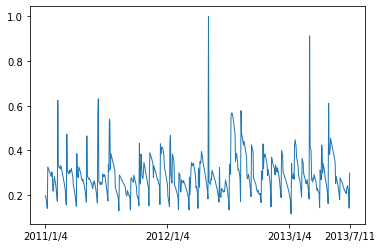

In [184]:
## 根据Eviews估计出来的联跳强度序列画图
coj_intensity_csy = pd.read_excel('coj_intensity_csy.xlsx')
h_csy = coj_intensity_csy['h'].tolist()
coj_intensity_wind = pd.read_excel('coj_intensity_wind.xlsx')
h = coj_intensity_wind['h'].tolist()

## csy
# 画图
fig = plt.figure()  
ax = fig.add_subplot(1,1,1)
x = np.arange(len(h_csy))
ax.plot(x, h_csy, linewidth=1)
plt.xticks([0, 244, 487, 608], ['2011/1/4', '2012/1/4', '2013/1/4', '2013/7/11'])
plt.savefig('coj_intensity_csy.png', dpi=300)

In [182]:
# 分析
coj_csy = pd.DataFrame([date, h_csy], index=['date', 'h']).T
# 联跳强度 > 0.5
coj_csy_high = coj_csy[coj_csy['h'] > 0.5]
print('联跳强度大于0.5的总天数：%d' % len(coj_csy_high))
print('估计区间联跳强度大于0.5的天数：%d' % len(coj_csy_high[coj_csy_high['date'] < '2013-01-01']))
print('预测区间联跳强度大于0.5的天数：%d' % len(coj_csy_high[coj_csy_high['date'] > '2013-01-01']))

# 与实际联跳重合部分
df = pd.read_excel('coj_csy.xlsx')
coj_day = df[df['CJ'] == 1]['date'].tolist() # 实际联跳的交易日
est = coj_csy_high[coj_csy_high['date'] < '2013-01-01']['date'].tolist() # 估计区间联跳强度>0.5的交易日
fore = coj_csy_high[coj_csy_high['date'] > '2013-01-01']['date'].tolist() # 预测区间联跳强度>0.5的交易日

# 估计区间
est_overlap = []
for day in coj_day:
    if day in est:
        est_overlap.append(day)
print('估计区间联跳强度大于0.5的交易日，实际发生联跳的天数：%d' % len(est_overlap))

# 预测区间
fore_overlap = []
for day in coj_day:
    if day in fore:
        fore_overlap.append(day)
print('预测区间联跳强度大于0.5的交易日，实际发生联跳的天数：%d' % len(fore_overlap))

联跳强度大于0.5的总天数：16
估计区间联跳强度大于0.5的天数：14
预测区间联跳强度大于0.5的天数：2
估计区间联跳强度大于0.5的交易日，实际发生联跳的天数：9
预测区间联跳强度大于0.5的交易日，实际发生联跳的天数：1


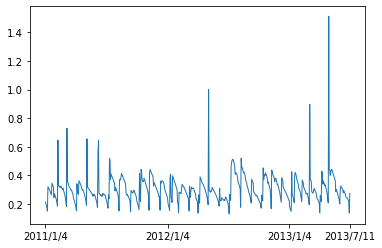

In [185]:
## wind
# 画图
fig = plt.figure()  
ax = fig.add_subplot(1,1,1)
x = np.arange(len(h))
ax.plot(x, h, linewidth=1)
plt.xticks([0, 244, 487, 608], ['2011/1/4', '2012/1/4', '2013/1/4', '2013/7/11'])
plt.savefig('coj_intensity_wind.png', dpi=300)

In [189]:
# 分析
coj = pd.DataFrame([date, h], index=['date', 'h']).T
# 联跳强度 > 0.5
coj_high = coj[coj['h'] > 0.5]
print('联跳强度大于0.5的总天数：%d' % len(coj_high))
print('估计区间联跳强度大于0.5的天数：%d' % len(coj_high[coj_high['date'] < '2013-01-01']))
print('预测区间联跳强度大于0.5的天数：%d' % len(coj_high[coj_high['date'] > '2013-01-01']))

# 与实际联跳重合部分
df = pd.read_excel('coj_wind.xlsx')
coj_day = df[df['CJ'] == 1]['date'].tolist() # 实际联跳的交易日
est = coj_high[coj_high['date'] < '2013-01-01']['date'].tolist() # 估计区间联跳强度>0.5的交易日
fore = coj_high[coj_high['date'] > '2013-01-01']['date'].tolist() # 预测区间联跳强度>0.5的交易日

# 估计区间
est_overlap = []
for day in coj_day:
    if day in est:
        est_overlap.append(day)
print('估计区间联跳强度大于0.5的交易日，实际发生联跳的天数：%d' % len(est_overlap))

# 预测区间
fore_overlap = []
for day in coj_day:
    if day in fore:
        fore_overlap.append(day)
print('预测区间联跳强度大于0.5的交易日，实际发生联跳的天数：%d' % len(fore_overlap))

联跳强度大于0.5的总天数：14
估计区间联跳强度大于0.5的天数：12
预测区间联跳强度大于0.5的天数：2
估计区间联跳强度大于0.5的交易日，实际发生联跳的天数：8
预测区间联跳强度大于0.5的交易日，实际发生联跳的天数：0
